# Tarea 13

__Ejercicio 1:__ Resolver oscilador amortiguado: $$m \ddot x=-k x -b \dot x,$$ usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$. Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos. 

Como $b^2-4km=-3<0$ , entonces consideraremos el caso que es un sistema subamortiguado. 

Ademas, la solucion de esta ecuacion, vista en EDO, es:
$$x\left( t\right) =e^{-\dfrac {bt}{2m}}\left[ c_{1}\cos \left( \dfrac {\sqrt {4km-b^{2}}}{2m}t\right) +c_{2}\sin \left( \dfrac {\sqrt {4km-b^{2}}}{2m}t\right) \right] $$, aplicando las condiciones iniciales y los valores k, m y b, tendremos que es:
$$x\left( t\right) =e^{-\dfrac {t}{2}}\left[ \cos \left( \dfrac {\sqrt {3}}{2}t\right) +\dfrac {1}{\sqrt3}\sin \left( \dfrac {\sqrt {3}}{2}t\right) \right] $$

Asi, $$x'\left( t\right) =-e^{-\dfrac {t}{2}}\left[ \dfrac {2}{\sqrt {3}}\sin \left( \dfrac {\sqrt {3}}{2}t\right) \right] $$

In [1]:
using PyPlot

In [2]:
#como la funcion x solo depende de una variable, t , entonces modificaremos el codigo para este problema, teniendo solo una dependencia con x
function euler(f,listt,x0)
     x = x0
     h = listt[2]-listt[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(listt)
        t = listt[i]
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end

euler (generic function with 1 method)

In [3]:
function RK_4(f,listt,x0)
     x = x0
     l = (listt[2]-listt[1])/2.0
     listx=[]
     push!(listx,x)
     for i in 2:length(listt)
        t = listt[i]
        k1 = f(x,t)
        k2 = f(x+l*k1,t+l)
        k3 = f(x+l*k2,t+l)
        k4 = f(x+2l*k3,t+2l)
        x += (l/3.0)*(k1+2k2+2k3+k4)
        push!(listx,x) 
     end
     return listx
end

RK_4 (generic function with 1 method)

In [6]:
#escribiendo las soluciones x(t) y x'(t) como
X(t)=exp(-t/2)*(cos((sqrt(3)t/2))+(1/(sqrt(3)))*sin((sqrt(3)t/2)))
V(t)=-exp(-t/2)*(2/(sqrt(3)))*sin((sqrt(3)t/2))

V (generic function with 1 method)

In [7]:
f(x,t)=[x[2],-x[1]-x[2]]

f (generic function with 1 method)

In [8]:
listtE=0:0.1:50;        #h=0.1
vecE=euler(f,listtE,[1,0]);

In [9]:
listxE1=map(x->x[1],vecE)
listxE2=map(x->x[2],vecE)

501-element Array{Any,1}:
  0          
 -0.1        
 -0.19       
 -0.27       
 -0.3401     
 -0.40049    
 -0.45144    
 -0.49329    
 -0.526441   
 -0.551344   
 -0.568492   
 -0.578411   
 -0.581654   
  ⋮          
 -5.08255e-11
 -5.68993e-11
 -6.18574e-11
 -6.57506e-11
 -6.8636e-11 
 -7.05754e-11
 -7.16344e-11
 -7.18818e-11
 -7.13881e-11
 -7.0225e-11 
 -6.84643e-11
 -6.61774e-11

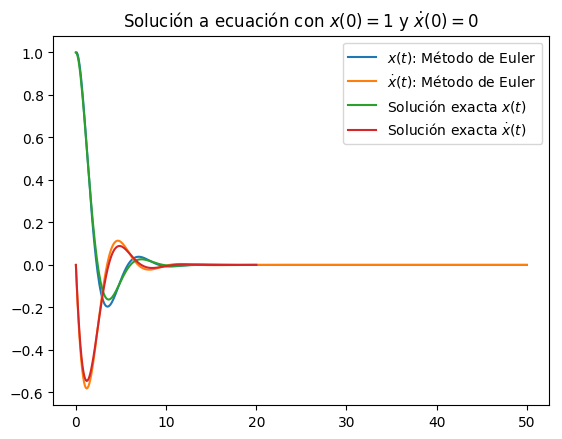

In [10]:
plot(listtE,listxE1,label=L"$x(t)$: Método de Euler")
plot(listtE,listxE2,label=L"$\dot{x}(t)$: Método de Euler");
t=linspace(0,20,200)
plot(t,X.(t),label=L"Solución exacta $x(t)$")
plot(t,V.(t),label=L"Solución exacta $\dot{x}(t)$")
title(L"Solución a ecuación con $x(0)=1$ y $\dot{x}(0)=0$")
legend()
show();

Comparemos con el metodo de RK4

In [11]:
listtRK=0:0.1:50;             # Paso h=0.1
vecRK=RK_4(f,listtRK,[1,0]);

In [12]:
listxRK1=map(x->x[1],vecRK);
listxRK2=map(x->x[2],vecRK);

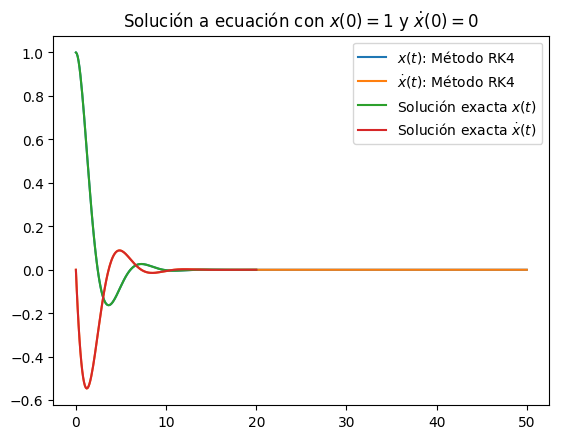

In [13]:
plot(listtRK,listxRK1,label=L"$x(t)$: Método RK4")
plot(listtRK,listxRK2,label=L"$\dot{x}(t)$: Método RK4");
t=linspace(0,20,200)
plot(t,X.(t),label=L"Solución exacta $x(t)$")
plot(t,V.(t),label=L"Solución exacta $\dot{x}(t)$")
title(L"Solución a ecuación con $x(0)=1$ y $\dot{x}(0)=0$")
legend()
show();

In [14]:
#graficamos el espacio fase 
listtEE=0:0.01:50;             #h=0.01
vecEE=euler(f,listtEE,[1,0])
listxEE1=map(x->x[1],vecEE)
listxEE2=map(x->x[2],vecEE)

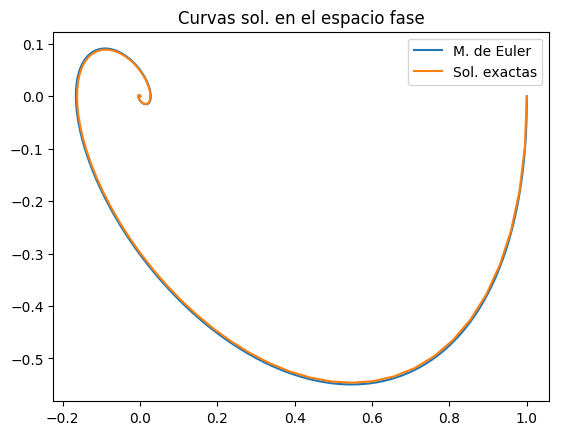

In [15]:
plot(listxEE1,listxEE2,label="M. de Euler");
t = linspace(0,20,200)
plot(X.(t),V.(t),label="Sol. exactas");
title("Curvas sol. en el espacio fase")
legend()
show();

In [20]:
#h=0.01
listtRK4=0:0.01:50;             # Paso h=0.01
vecRK4=RK_4(f,listtRK4,[1,0]);
listxRK41=map(x->x[1],vecRK4);
listxRK42=map(x->x[2],vecRK4);

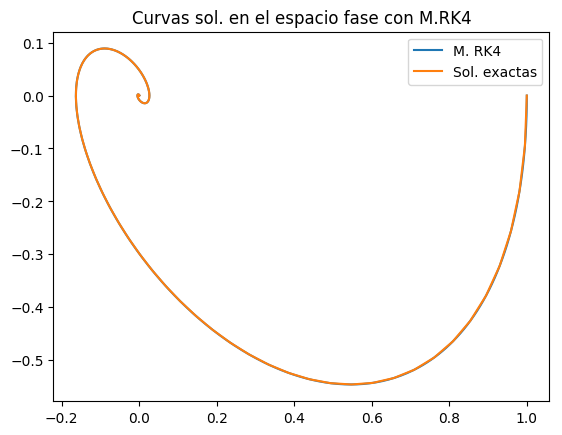

In [21]:
plot(listxRK41,listxRK42,label="M. RK4");
t = linspace(0,20,200)
plot(X.(t),V.(t),label="Sol. exactas");
title("Curvas sol. en el espacio fase con M.RK4")
legend()
show();

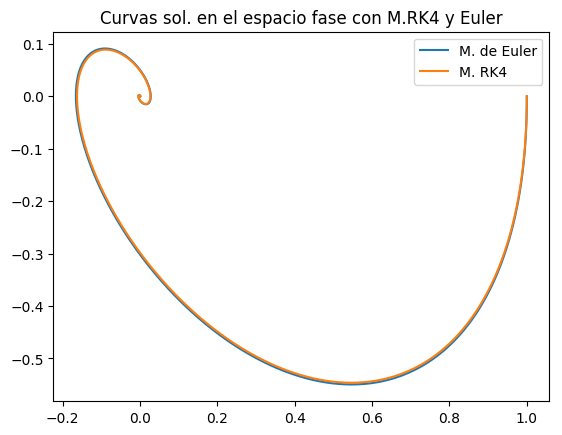

In [22]:
plot(listxEE1,listxEE2,label="M. de Euler")
plot(listxRK41,listxRK42,label="M. RK4");
t = linspace(0,20,200)
title("Curvas sol. en el espacio fase con M.RK4 y Euler")
legend()
show();

__Ejercicio 2:__ Resolver el péndulo simple: $$l \ddot\theta=-g \sin(\theta),$$ usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

Obs. Usando que $l=g=1$. Se tiene que $\ddot\theta=-\sin(\theta),$ entonces si definimos 

In [30]:
k(θ,t)=[θ[2],-sin(θ[1])]

k (generic function with 1 method)

Hagamos un codigo que grafique todas las curvas en el espacio fase con diferentes condiciones iniciales; por lo que consideramos


In [36]:
function metodo_RK4(f,x0,ti,tf,n)
    h=(tf-ti)/n    #Buscamos h
    listt=linspace(ti,tf,n+1)   #Hacemos el primer intervalo
    listx=[] #Tomamos el primer valor de x0 en la lista solución
    push!(listx,x0)
    x=x0
    #Método de Runge-kutta orden 4
    for i in 1:length(listt)-1
        k1=f(x,listt[i])
        k2=f(x+(h/2)*k1,listt[i]+(h/2))
        k3=f(x+(h/2)*k2,listt[i]+(h/2))
        k4=f(x+h*k3,listt[i+1])
        y=x+(h/6)*(k1+2*k2+2*k3+k4)
        push!(listx,y)
        x=y
    end
    return listt,listx
end


metodo_RK4 (generic function with 1 method)

In [46]:
function metodo_RK4h(f,xi,ti,tf,h)
    n=Int(round((tf-ti)/h))
    return metodo_RK4(f,xi,ti,tf,n)
end

metodo_RK4h (generic function with 1 method)

In [47]:
ti=0
tf=6*pi
n=1000;

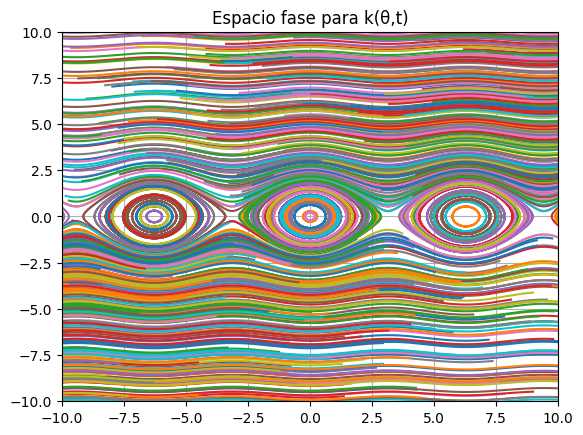

In [49]:
for i in 1:n
    k_0=(rand(2)-rand(2))*20
    LRK_i=metodo_RK4h(k,k_0,ti,tf,.001)
    plot(map(θ->θ[1],LRK_i[2]),map(θ->θ[2],LRK_i[2]))
end
gca()[:set_xlim]((-10,10))
gca()[:set_ylim]((-10,10))
title("Espacio fase para k(θ,t)")
legend()
grid("on")
show()

Vemos que en las elipses que tienen a cero el movimiento del péndulo se hace nulo, es decir su energia es 0, esto es importante ya que es inestable el sistema y cualquier perturbación su movimiento será descrito ya sea por rotaciones u oscilaciones. Dentro de este subespacio de elipses su movimiento es oscilatorio y fuera de esas curvas el movimiento tienen a ser circular ($\theta$ ), de esta manera las curvas de fase son periodicas y sinoidales como una función del tiempo. 


__Ejercicio 3:__ Comprobar numéricamente (con Runge-Kutta orden $4$) que en el sistema: $$\frac{dx}{dt}=x^2-1,$$ hay dos puntos fijos, ubicados en $1$ y $-1$, compruebe además que el $1$ es un repulsor y el $-1$ un atractor. Para hacer esto necesitará graficar muchas condiciones iniciales, generelas aleatoriamente y gráfiquelas en el espacio $(x(t),t)$.

In [51]:
#Definamos la funcion y sus parametros, veamos como se comportan las curvas en el espacio fase tratando de hacer varias condiciones iniciales 
f1(x,t)=(x^2-1)
ti1=0
tf1=4
h1=.001
n1=500;

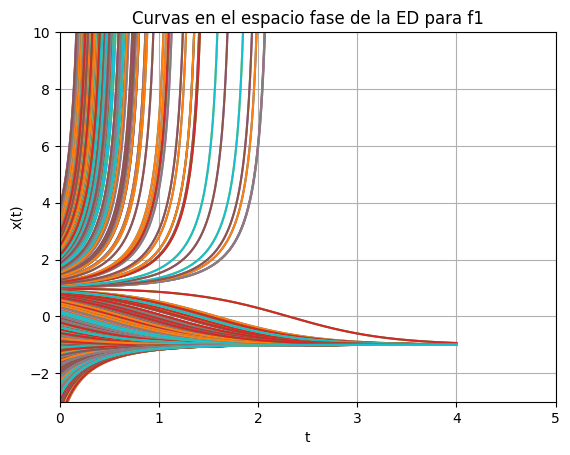

In [57]:
for i in 1:n1
    
    x01_1=(rand(1)-rand(1))*4
   LRK1_i=metodo_RK4h(f1,x01_1[1],ti1,tf1,h1)
    plot(LRK1_i[1],map(x->x[1],LRK1_i[2]))
    
    #Enfoque datos en 1
    x03_3=1+(rand(1)-2rand(1))*.25
    LRK1_i=metodo_RK4h(f1,x01_1[1],ti1,tf1,h1)
    plot(LRK1_i[1],map(x->x[1],LRK1_i[2]))
end

gca()[:set_xlim]((0,5))
gca()[:set_ylim]((-3,10))

title("Curvas en el espacio fase de la ED para f1")
legend()
xlabel("t")
ylabel("x(t)")
grid("on")
show()

Podemos observar que los puntos fijos donde las curvas de nivel estan situados en $x=1$ y $x=-1$, donde es un punto atractor y respulsor, respectivamente.

__Ejercicio 4:__ También con Runge-Kutta orden $4, $Resuelva numéricamente el sistema: $$\frac{dx}{dt}=x^2,$$ cual es el punto fijo único?, es un atractor o un repulsor?. Utilice de igual forma muchas condiciones iniciales y gráfiquelas en el mismo espacio que en el ejercicio anterior.

In [58]:
#Aplicamos la funcion y los parametros en las cuales queremos ver las curvas de fase;
f2(x,t)=(x^2)
ti2=0
tf2=4
h2=0.001
n2=500;

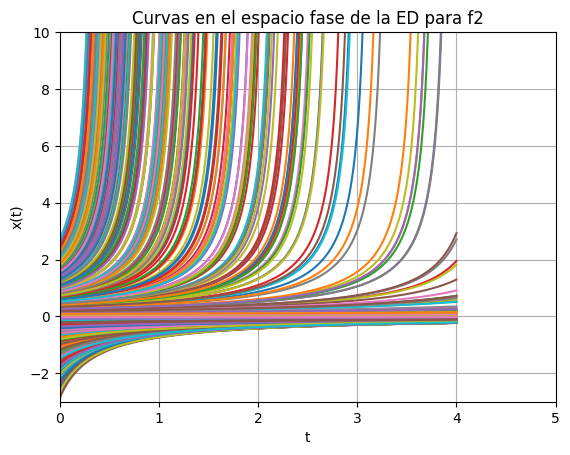

In [60]:
for i in 1:n1
    x02_1=(rand(1)-rand(1))*3
   LRK2_i=metodo_RK4h(f2,x02_1[1],ti2,tf2,h2)
    plot(LRK2_i[1],map(x->x[1],LRK2_i[2]))
end

gca()[:set_xlim]((0,5))
gca()[:set_ylim]((-3,10))

title("Curvas en el espacio fase de la ED para f2")
legend()
xlabel("t")
ylabel("x(t)")
grid("on")
show()

Podemos ver que existe un punto fijo $x=0$ unico , para cual cuando $x(t) >0$ es un punto atractor y en el caso contrario es repulsor.

__Ejercicio 5:__ Resolver con Runge-Kutta orden $4$ el sistema de ecuaciones: $$\frac{d\vec x}{dt}=\left(\begin{array}{cc} a & b \\ c & d \end{array}\right)\vec x,$$ donde $\vec x= \left(x(t),y(t)\right)^{\text{T}}.$ Grafique los espacios de fase tomando muchas condiciones iniciales aleatorias y fijando los rangos de los ejes alrededor del origen, de tal forma que se aprecie el compotamiento de las soluciones. Haga esto para los sistemas con:
$$a=c=1, b=d=0$$
$$a=c=-1, b=d=0$$
$$a=1, b=-2, c=d=0$$
$$a=1, b=-0.5, c=d=0$$
$$a=d=0, b=-c=1$$
$$a=d=1, b=-c=1$$
$$a=d=-1, b=-c=1$$
$$a=d=-1, b=-c=-1$$
$$a=b=1, b=4,c=-2$$
$$a=b=d=-1, c=0$$

In [61]:
function graph(F,Ti,Tf,H,N,L) #funcion G que grafique todas las curvas de fase
    for i in 1:N
        X1=((rand(1)-rand(1))*L)[1]
        Y1=((rand(1)-rand(1))*L)[1]
        X0=[X1;Y1]
        D_i=metodo_RK4h(F,X0,Ti,Tf,H)
        plot(map(x->x[1],D_i[2]),map(x->x[2],D_i[2]))
    end
    gca()[:set_xlim]((-L,L))
    gca()[:set_ylim]((-L,L))

    title("Posición")
    legend()
    xlabel("X(t)")
    ylabel("Y(t)")
    grid("on")
    return show()
end

graph (generic function with 1 method)

__$$a=c=1, b=d=0$$__

In [66]:
Ti=0
Tf=4
H=.001
N=2000
L=100;

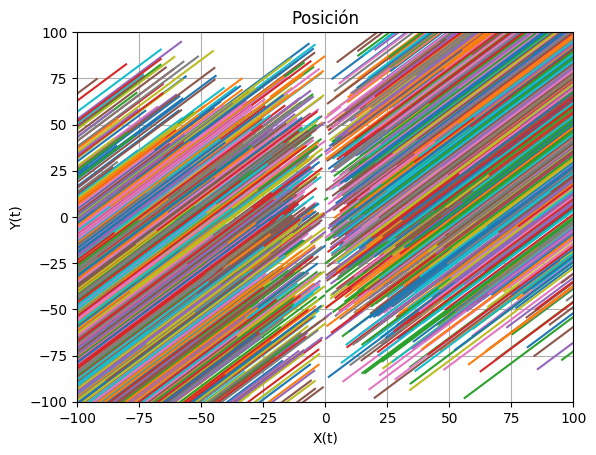

In [72]:
#sustituyendo los elementos de la matriz
a=c=1
b=d=0
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

__$$a=1, b=-2, c=d=0$$__


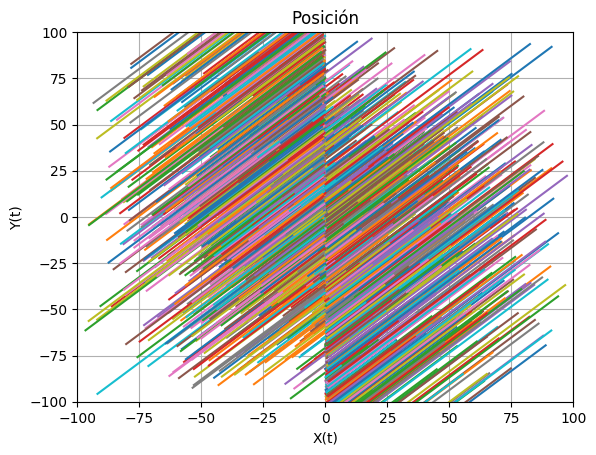

In [71]:
a=1
b=-2
c=d=0
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

__$$a=c=-1, b=d=0$$__


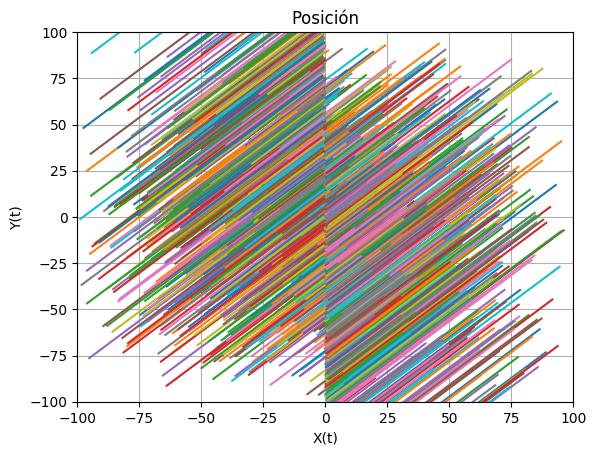

In [73]:
a=c=-1
b=d=0
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

$$a=1, b=-0.5, c=d=0$$


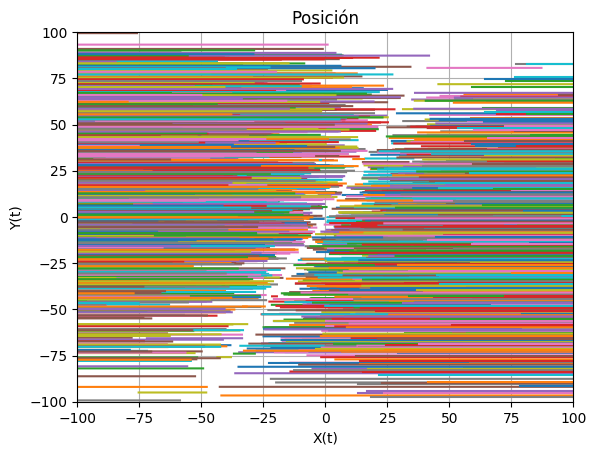

In [74]:
a=1
b=-.5
c=d=0
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

$$a=d=0, b=-c=1$$

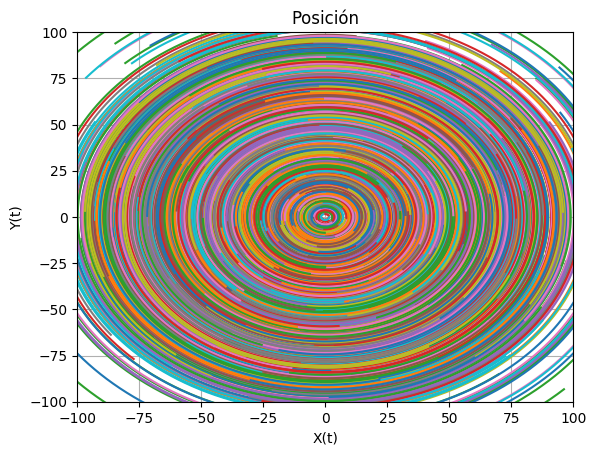

In [75]:
a=d=0
b=1
c=-1
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)


$$a=d=1, b=-c=1$$


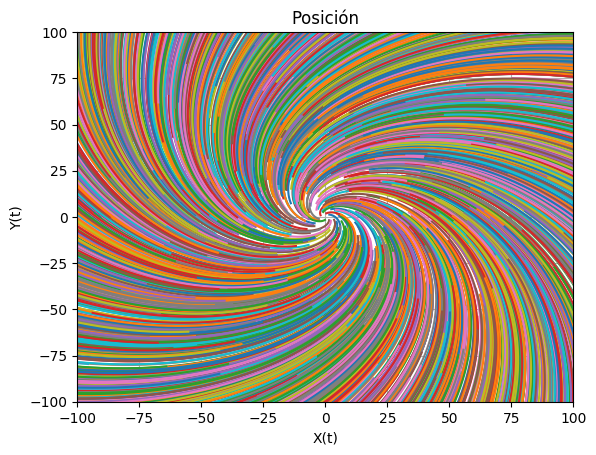

In [76]:
a=d=1
b=1
c=-b
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

$$a=d=-1, b=-c=1$$


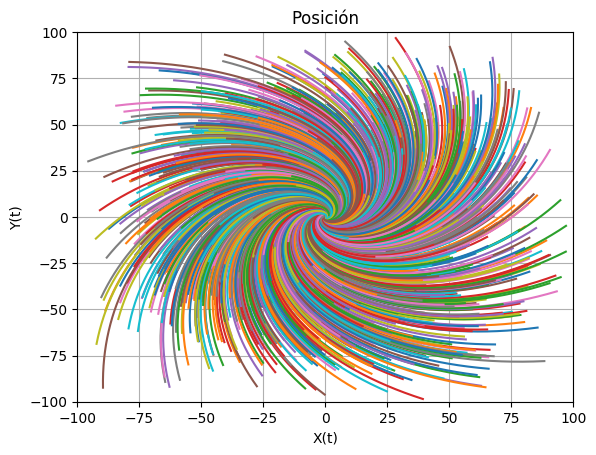

In [77]:
a=d=-1
b=1
c=-b
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

$$a=d=-1, b=-c=-1$$


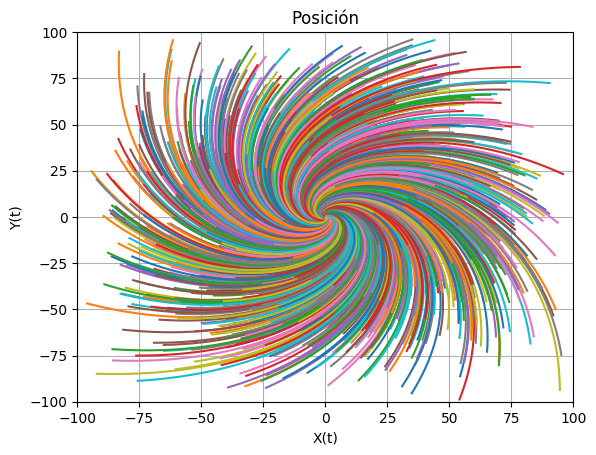

In [78]:
a=d=-1
b=-1
c=-b
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

$$a=b=1, b=4,c=-2$$


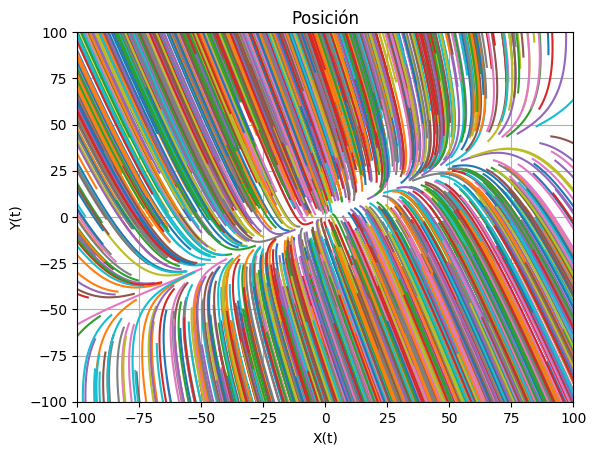

In [79]:
a=b=1
b=-1
d=4
c=-2
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)

$$a=b=d=-1, c=0$$

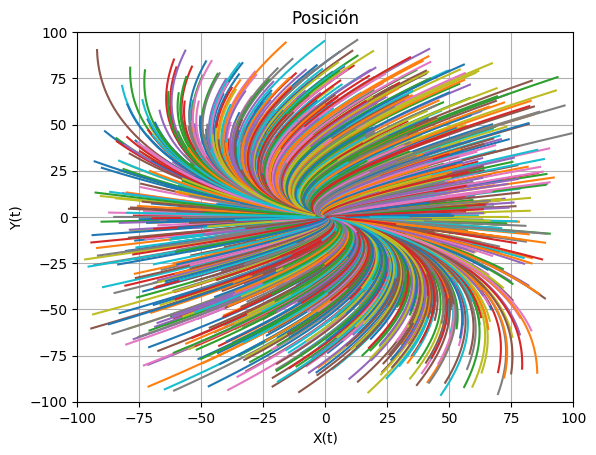

In [80]:
a=b=d=-1
c=0
A=[a b;c d]
F(x,t)=A*[x[1];x[2]]
graph(F,Ti,Tf,H,N,L)